In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import folium
import re
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
def concat_frames_columns_lni(geo_response, response, date_range, time_range='6pm-11:59pm', days='m-f', in_or_out='inbound'):
    """This function pulls in two API requests, puts one in a geodataframe the other in a dataframe and concats desired columns"""
    geo_df = gpd.GeoDataFrame.from_features(geo_response.json()['features'])
    res_df = pd.DataFrame(response.json()['data']['segments'])
    full_df = pd.concat([geo_df, res_df[['countForSegment', 'percent20Secs']]], axis = 1)
    full_df['dates'] = date_range
    full_df['time'] = time_range
    full_df['days_of_week'] = days
    full_df['direction']= in_or_out
    full_df['max_seg_count'] = full_df['countForSegment'].max()
    full_df['proportion_of_segments'] = full_df['countForSegment']/full_df['max_seg_count']
    return full_df

In [3]:
with open('../data/WeGo.json') as fi:
    credentials = json.load(fi)

In [4]:
Authorization = credentials['Authorization']

In [5]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/23'

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [6]:
params = {
    'direction': '1',
    'startDate': '01-25-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '02-24-2022',
    'endTime' : '23:59',
    'excludeDates': '02-18-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}

#use the EXACT same parameters as above except do not include the format parameter below
params1 = {
    'direction': '1',
    'startDate': '01-25-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '02-24-2022',
    'endTime' : '23:59',
    'excludeDates': '02-18-2022',
    'resolution': 'hiRes',
}

In [7]:
lni_jantofeb = concat_frames_columns_lni(requests.get(URL, params = params, headers = headers), 
                                      requests.get(URL, params = params1, headers = headers), "1/25/22-2/24/22")
lni_jantofeb

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.78110 36.16730, -86.78121 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,5.048128,4.786131,39.293,6.993,...,2.990,2.330,320,3.391,1/25/22-2/24/22,6pm-11:59pm,m-f,inbound,333,0.960961
1,"LINESTRING (-86.76911 36.20381, -86.76915 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.150080,11.285627,6.106,3.153,...,1.543,1.319,325,1.618,1/25/22-2/24/22,6pm-11:59pm,m-f,inbound,333,0.975976
2,"LINESTRING (-86.77604 36.16755, -86.77628 36.1...",WOON1SWF,Woodland St & N 1st St Wb,UNI2AWN,Union St & 2nd Ave Wb,24.869,1.969554,12.626717,3.795,2.344,...,1.598,1.408,327,1.697,1/25/22-2/24/22,6pm-11:59pm,m-f,inbound,333,0.981982
3,"LINESTRING (-86.77385 36.17218, -86.77381 36.1...",1SOLDSM,N 1st St & Oldham St Sb,WOON1SWF,Woodland St & N 1st St Wb,23.964,1.966675,12.185033,7.447,2.253,...,1.438,1.198,329,1.502,1/25/22-2/24/22,6pm-11:59pm,m-f,inbound,333,0.987988
4,"LINESTRING (-86.77266 36.19266, -86.77269 36.1...",DICLIGSF,Dickerson Pike & Ligon Ave Sb,DICRICSN,Dickerson Pike & Richardson Ave Sb,24.381,1.817740,13.412809,5.160,2.270,...,1.441,1.049,319,1.511,1/25/22-2/24/22,6pm-11:59pm,m-f,inbound,333,0.957958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,"LINESTRING (-86.77063 36.19883, -86.77073 36.1...",DICGATSN,Dickerson Pike & Gatewood Ave Sb,DICMARSM,Dicerkson Pike & Marie Sb,23.038,1.912413,12.046561,8.389,2.294,...,1.397,1.181,305,1.476,1/25/22-2/24/22,6pm-11:59pm,m-f,inbound,333,0.915916
443,"LINESTRING (-86.76053 36.22505, -86.76060 36.2...",DICHILSF,Dickerson Pike & Hillhurst Dr Sb,DICSUNSN,Dickerson Pike & Sunset Cr Sb,23.132,1.615729,14.316757,14.411,1.872,...,1.313,1.168,317,1.387,1/25/22-2/24/22,6pm-11:59pm,m-f,inbound,333,0.951952
444,"LINESTRING (-86.76968 36.20101, -86.76973 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,1.863668,13.020023,5.127,2.416,...,1.459,1.111,322,1.549,1/25/22-2/24/22,6pm-11:59pm,m-f,inbound,333,0.966967
445,"LINESTRING (-86.77093 36.19825, -86.77103 36.1...",DICMARSM,Dicerkson Pike & Marie Sb,DICLUCSN,Dickerson Pike & Lucile St Sb,23.359,1.831932,12.751019,6.609,2.176,...,1.410,1.197,309,1.467,1/25/22-2/24/22,6pm-11:59pm,m-f,inbound,333,0.927928


In [8]:
params = {
    'direction': '1',
    'startDate': '02-25-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '03-26-2022',
    'endTime' : '23:59',
    'excludeDates': '03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params1 = {
    'direction': '1',
    'startDate': '02-25-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '03-26-2022',
    'endTime' : '23:59',
    'excludeDates': '03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022',
    'resolution': 'hiRes',
}


In [9]:
lni_febtomar = concat_frames_columns_lni(requests.get(URL, params = params, headers = headers), 
                                      requests.get(URL, params = params1, headers = headers), "2/25/22-3/26/22")
lni_febtomar

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.78110 36.16730, -86.78121 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,4.896679,4.934160,52.849,6.158,...,2.985,1.875,234,3.443,2/25/22-3/26/22,6pm-11:59pm,m-f,inbound,245,0.955102
1,"LINESTRING (-86.76911 36.20381, -86.76915 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.372853,10.226086,6.693,3.761,...,1.536,1.363,238,1.672,2/25/22-3/26/22,6pm-11:59pm,m-f,inbound,245,0.971429
2,"LINESTRING (-86.77604 36.16755, -86.77628 36.1...",WOON1SWF,Woodland St & N 1st St Wb,UNI2AWN,Union St & 2nd Ave Wb,24.869,2.044229,12.165467,9.168,2.490,...,1.645,1.457,236,1.717,2/25/22-3/26/22,6pm-11:59pm,m-f,inbound,245,0.963265
3,"LINESTRING (-86.77385 36.17218, -86.77381 36.1...",1SOLDSM,N 1st St & Oldham St Sb,WOON1SWF,Woodland St & N 1st St Wb,23.964,1.882197,12.731930,8.871,2.203,...,1.469,1.196,239,1.565,2/25/22-3/26/22,6pm-11:59pm,m-f,inbound,245,0.975510
4,"LINESTRING (-86.77266 36.19266, -86.77269 36.1...",DICLIGSF,Dickerson Pike & Ligon Ave Sb,DICRICSN,Dickerson Pike & Richardson Ave Sb,24.381,1.866570,13.061926,5.331,2.295,...,1.449,1.088,230,1.519,2/25/22-3/26/22,6pm-11:59pm,m-f,inbound,245,0.938776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,"LINESTRING (-86.77063 36.19883, -86.77073 36.1...",DICGATSN,Dickerson Pike & Gatewood Ave Sb,DICMARSM,Dicerkson Pike & Marie Sb,23.038,1.872566,12.302904,8.406,2.292,...,1.393,1.172,219,1.494,2/25/22-3/26/22,6pm-11:59pm,m-f,inbound,245,0.893878
443,"LINESTRING (-86.76053 36.22505, -86.76060 36.2...",DICHILSF,Dickerson Pike & Hillhurst Dr Sb,DICSUNSN,Dickerson Pike & Sunset Cr Sb,23.132,1.600385,14.454022,2.996,1.907,...,1.326,1.044,226,1.414,2/25/22-3/26/22,6pm-11:59pm,m-f,inbound,245,0.922449
444,"LINESTRING (-86.76968 36.20101, -86.76973 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,1.866521,13.000122,5.162,2.346,...,1.454,1.219,236,1.549,2/25/22-3/26/22,6pm-11:59pm,m-f,inbound,245,0.963265
445,"LINESTRING (-86.77093 36.19825, -86.77103 36.1...",DICMARSM,Dicerkson Pike & Marie Sb,DICLUCSN,Dickerson Pike & Lucile St Sb,23.359,1.909205,12.234935,7.424,2.405,...,1.400,1.189,224,1.480,2/25/22-3/26/22,6pm-11:59pm,m-f,inbound,245,0.914286


In [14]:
params = {
    'direction': '1',
    'startDate': '03-27-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '04-26-2022',
    'endTime' : '23:59',
    'excludeDates': '04-14-2022,04-15-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params1 = {
    'direction': '1',
    'startDate': '03-27-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '04-26-2022',
    'endTime' : '23:59',
    'excludeDates': '04-14-2022,04-15-2022',
    'resolution': 'hiRes',
}

In [15]:
lni_martoapr = concat_frames_columns_lni(requests.get(URL, params = params, headers = headers), 
                                       requests.get(URL, params = params1, headers = headers), "3/27/22-4/26/22")
lni_martoapr

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.78110 36.16730, -86.78121 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,4.987508,4.844303,23.611,6.886,...,3.219,1.916,305,3.585,3/27/22-4/26/22,6pm-11:59pm,m-f,inbound,310,0.983871
1,"LINESTRING (-86.76911 36.20381, -86.76915 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.241747,10.824147,7.149,3.730,...,1.462,1.171,308,1.590,3/27/22-4/26/22,6pm-11:59pm,m-f,inbound,310,0.993548
2,"LINESTRING (-86.77604 36.16755, -86.77628 36.1...",WOON1SWF,Woodland St & N 1st St Wb,UNI2AWN,Union St & 2nd Ave Wb,24.869,2.050540,12.128025,5.200,2.443,...,1.671,1.379,309,1.759,3/27/22-4/26/22,6pm-11:59pm,m-f,inbound,310,0.996774
3,"LINESTRING (-86.77385 36.17218, -86.77381 36.1...",1SOLDSM,N 1st St & Oldham St Sb,WOON1SWF,Woodland St & N 1st St Wb,23.964,1.927977,12.429609,10.422,2.282,...,1.469,1.156,302,1.561,3/27/22-4/26/22,6pm-11:59pm,m-f,inbound,310,0.974194
4,"LINESTRING (-86.77266 36.19266, -86.77269 36.1...",DICLIGSF,Dickerson Pike & Ligon Ave Sb,DICRICSN,Dickerson Pike & Richardson Ave Sb,24.381,1.841611,13.238952,5.081,2.589,...,1.372,1.169,285,1.455,3/27/22-4/26/22,6pm-11:59pm,m-f,inbound,310,0.919355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,"LINESTRING (-86.76053 36.22505, -86.76060 36.2...",DICHILSF,Dickerson Pike & Hillhurst Dr Sb,DICSUNSN,Dickerson Pike & Sunset Cr Sb,23.132,1.567973,14.752805,2.894,1.880,...,1.268,1.089,295,1.358,3/27/22-4/26/22,6pm-11:59pm,m-f,inbound,310,0.951613
463,"LINESTRING (-86.76968 36.20101, -86.76973 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,1.841259,13.178483,3.195,2.411,...,1.438,1.164,305,1.528,3/27/22-4/26/22,6pm-11:59pm,m-f,inbound,310,0.983871
464,"LINESTRING (-86.76409 36.21495, -86.76417 36.2...",DICLORSN,Dickerson Pk & Lorraine Ave Sb,DICLEMSF,Dickerson Pike & Lemuel Rd Sb,24.938,1.712222,14.564700,2.327,2.327,...,1.343,1.343,9,1.478,3/27/22-4/26/22,6pm-11:59pm,m-f,inbound,310,0.029032
465,"LINESTRING (-86.77093 36.19825, -86.77103 36.1...",DICMARSM,Dicerkson Pike & Marie Sb,DICLUCSN,Dickerson Pike & Lucile St Sb,23.359,2.098232,11.132706,10.879,3.241,...,1.351,1.042,284,1.432,3/27/22-4/26/22,6pm-11:59pm,m-f,inbound,310,0.916129


In [12]:
params = {
    'direction': '1',
    'startDate': '04-27-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '05-25-2022',
    'endTime' : '23:59',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params1 = {
    'direction': '1',
    'startDate': '04-27-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '05-25-2022',
    'endTime' : '23:59',
    'resolution': 'hiRes',
}

In [13]:
lni_aprtomay = concat_frames_columns_lni(requests.get(URL, params = params, headers = headers), 
                                      requests.get(URL, params = params1, headers = headers), "4/27/22-5/25/22")
lni_aprtomay

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.78110 36.16730, -86.78121 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,4.778195,5.056512,22.765,6.595,...,3.159,1.288,318,3.494,4/27/22-5/25/22,6pm-11:59pm,m-f,inbound,341,0.932551
1,"LINESTRING (-86.76911 36.20381, -86.76915 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.258078,10.745864,11.241,3.528,...,1.461,1.118,335,1.591,4/27/22-5/25/22,6pm-11:59pm,m-f,inbound,341,0.982405
2,"LINESTRING (-86.77604 36.16755, -86.77628 36.1...",WOON1SWF,Woodland St & N 1st St Wb,UNI2AWN,Union St & 2nd Ave Wb,24.869,1.997240,12.451683,3.932,2.382,...,1.677,1.310,333,1.758,4/27/22-5/25/22,6pm-11:59pm,m-f,inbound,341,0.976540
3,"LINESTRING (-86.77266 36.19266, -86.77269 36.1...",DICLIGSF,Dickerson Pike & Ligon Ave Sb,DICRICSN,Dickerson Pike & Richardson Ave Sb,24.381,1.825483,13.355917,4.901,2.277,...,1.384,1.077,325,1.488,4/27/22-5/25/22,6pm-11:59pm,m-f,inbound,341,0.953079
4,"LINESTRING (-86.77385 36.17218, -86.77381 36.1...",1SOLDSM,N 1st St & Oldham St Sb,WOON1SWF,Woodland St & N 1st St Wb,23.964,1.900802,12.607310,7.357,2.339,...,1.411,1.146,323,1.491,4/27/22-5/25/22,6pm-11:59pm,m-f,inbound,341,0.947214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,"LINESTRING (-86.77063 36.19883, -86.77073 36.1...",DICGATSN,Dickerson Pike & Gatewood Ave Sb,DICMARSM,Dicerkson Pike & Marie Sb,23.038,1.829223,12.594419,9.215,2.202,...,1.315,1.043,283,1.412,4/27/22-5/25/22,6pm-11:59pm,m-f,inbound,341,0.829912
442,"LINESTRING (-86.76053 36.22505, -86.76060 36.2...",DICHILSF,Dickerson Pike & Hillhurst Dr Sb,DICSUNSN,Dickerson Pike & Sunset Cr Sb,23.132,1.566495,14.766724,3.560,1.865,...,1.248,1.120,325,1.338,4/27/22-5/25/22,6pm-11:59pm,m-f,inbound,341,0.953079
443,"LINESTRING (-86.76968 36.20101, -86.76973 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,1.840324,13.185178,4.962,2.437,...,1.332,1.098,330,1.442,4/27/22-5/25/22,6pm-11:59pm,m-f,inbound,341,0.967742
444,"LINESTRING (-86.76408 36.21494, -86.76416 36.2...",DICLORSN,Dickerson Pk & Lorraine Ave Sb,DICLEMSF,Dickerson Pike & Lemuel Rd Sb,24.938,1.928386,12.932058,11.176,2.399,...,1.325,1.037,202,1.432,4/27/22-5/25/22,6pm-11:59pm,m-f,inbound,341,0.592375


In [16]:
params = {
    'direction': '1',
    'startDate': '05-26-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '06-25-2022',
    'endTime' : '23:59',
    'excludeDates': '05-30-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params1 = {
    'direction': '1',
    'startDate': '05-26-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '06-25-2022',
    'endTime' : '23:59',
    'excludeDates': '05-30-2022',
    'resolution': 'hiRes',
}

In [17]:
lni_maytojun = concat_frames_columns_lni(requests.get(URL, params = params, headers = headers), 
                                      requests.get(URL, params = params1, headers = headers), "5/26/22-6/25/22")
lni_maytojun

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.78110 36.16730, -86.78121 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,4.614372,5.236032,33.354,6.429,...,3.055,2.376,290,3.344,5/26/22-6/25/22,6pm-11:59pm,m-f,inbound,329,0.881459
1,"LINESTRING (-86.76911 36.20381, -86.76915 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.155380,11.257876,12.139,3.333,...,1.406,1.197,329,1.523,5/26/22-6/25/22,6pm-11:59pm,m-f,inbound,329,1.000000
2,"LINESTRING (-86.77604 36.16755, -86.77628 36.1...",WOON1SWF,Woodland St & N 1st St Wb,UNI2AWN,Union St & 2nd Ave Wb,24.869,2.013158,12.353228,4.067,2.465,...,1.616,0.836,291,1.722,5/26/22-6/25/22,6pm-11:59pm,m-f,inbound,329,0.884498
3,"LINESTRING (-86.77385 36.17218, -86.77381 36.1...",1SOLDSM,N 1st St & Oldham St Sb,WOON1SWF,Woodland St & N 1st St Wb,23.964,2.023460,11.843081,32.857,2.383,...,1.395,1.163,285,1.478,5/26/22-6/25/22,6pm-11:59pm,m-f,inbound,329,0.866261
4,"LINESTRING (-86.77266 36.19266, -86.77269 36.1...",DICLIGSF,Dickerson Pike & Ligon Ave Sb,DICRICSN,Dickerson Pike & Richardson Ave Sb,24.381,1.824981,13.359591,4.678,2.356,...,1.350,0.972,312,1.450,5/26/22-6/25/22,6pm-11:59pm,m-f,inbound,329,0.948328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,"LINESTRING (-86.77063 36.19883, -86.77073 36.1...",DICGATSN,Dickerson Pike & Gatewood Ave Sb,DICMARSM,Dicerkson Pike & Marie Sb,23.038,1.797003,12.820235,10.303,2.273,...,1.261,1.032,286,1.358,5/26/22-6/25/22,6pm-11:59pm,m-f,inbound,329,0.869301
442,"LINESTRING (-86.76053 36.22505, -86.76060 36.2...",DICHILSF,Dickerson Pike & Hillhurst Dr Sb,DICSUNSN,Dickerson Pike & Sunset Cr Sb,23.132,1.580897,14.632199,5.592,1.955,...,1.259,1.086,319,1.333,5/26/22-6/25/22,6pm-11:59pm,m-f,inbound,329,0.969605
443,"LINESTRING (-86.76968 36.20101, -86.76973 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,1.812536,13.387320,8.122,2.386,...,1.353,1.117,323,1.448,5/26/22-6/25/22,6pm-11:59pm,m-f,inbound,329,0.981763
444,"LINESTRING (-86.77093 36.19825, -86.77103 36.1...",DICMARSM,Dicerkson Pike & Marie Sb,DICLUCSN,Dickerson Pike & Lucile St Sb,23.359,1.843062,12.674017,34.056,2.101,...,1.264,1.046,290,1.361,5/26/22-6/25/22,6pm-11:59pm,m-f,inbound,329,0.881459


In [18]:
params = {
    'direction': '1',
    'startDate': '06-26-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '07-26-2022',
    'endTime' : '23:59',
    'excludeDates': '07-04-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params1 = {
    'direction': '1',
    'startDate': '06-26-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '07-26-2022',
    'endTime' : '23:59',
    'excludeDates': '07-04-2022',
    'resolution': 'hiRes',
}

In [19]:
lni_juntojul = concat_frames_columns_lni(requests.get(URL, params = params, headers = headers), 
                                      requests.get(URL, params = params1, headers = headers), "6/26/22-7/26/22")
lni_juntojul

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.78110 36.16730, -86.78121 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,4.857712,4.973741,28.875,7.391,...,3.060,2.200,316,3.508,6/26/22-7/26/22,6pm-11:59pm,m-f,inbound,334,0.946108
1,"LINESTRING (-86.76911 36.20381, -86.76915 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.498610,9.711400,108.565,3.783,...,1.462,1.193,333,1.555,6/26/22-7/26/22,6pm-11:59pm,m-f,inbound,334,0.997006
2,"LINESTRING (-86.77604 36.16755, -86.77628 36.1...",WOON1SWF,Woodland St & N 1st St Wb,UNI2AWN,Union St & 2nd Ave Wb,24.869,2.005076,12.403021,4.580,2.407,...,1.607,0.696,314,1.722,6/26/22-7/26/22,6pm-11:59pm,m-f,inbound,334,0.940120
3,"LINESTRING (-86.77385 36.17218, -86.77381 36.1...",1SOLDSM,N 1st St & Oldham St Sb,WOON1SWF,Woodland St & N 1st St Wb,23.964,1.953697,12.265976,31.806,2.246,...,1.410,0.993,300,1.495,6/26/22-7/26/22,6pm-11:59pm,m-f,inbound,334,0.898204
4,"LINESTRING (-86.77266 36.19266, -86.77269 36.1...",DICLIGSF,Dickerson Pike & Ligon Ave Sb,DICRICSN,Dickerson Pike & Richardson Ave Sb,24.381,1.873199,13.015702,5.283,2.657,...,1.363,1.057,317,1.458,6/26/22-7/26/22,6pm-11:59pm,m-f,inbound,334,0.949102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,"LINESTRING (-86.77063 36.19883, -86.77073 36.1...",DICGATSN,Dickerson Pike & Gatewood Ave Sb,DICMARSM,Dicerkson Pike & Marie Sb,23.038,1.717649,13.412519,7.606,2.107,...,1.290,1.098,276,1.384,6/26/22-7/26/22,6pm-11:59pm,m-f,inbound,334,0.826347
441,"LINESTRING (-86.76053 36.22505, -86.76060 36.2...",DICHILSF,Dickerson Pike & Hillhurst Dr Sb,DICSUNSN,Dickerson Pike & Sunset Cr Sb,23.132,1.603317,14.427590,21.726,1.840,...,1.263,0.880,328,1.339,6/26/22-7/26/22,6pm-11:59pm,m-f,inbound,334,0.982036
442,"LINESTRING (-86.76968 36.20101, -86.76973 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,1.766714,13.734538,3.433,2.278,...,1.384,0.629,325,1.463,6/26/22-7/26/22,6pm-11:59pm,m-f,inbound,334,0.973054
443,"LINESTRING (-86.77093 36.19825, -86.77103 36.1...",DICMARSM,Dicerkson Pike & Marie Sb,DICLUCSN,Dickerson Pike & Lucile St Sb,23.359,1.676411,13.933934,6.651,1.966,...,1.298,1.114,280,1.369,6/26/22-7/26/22,6pm-11:59pm,m-f,inbound,334,0.838323


In [20]:
all_lni_inschool = pd.concat([lni_jantofeb, lni_febtomar, lni_martoapr, lni_aprtomay])
all_lni_inschool = all_lni_inschool.reset_index()
all_lni_inschool.describe()

,index,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count,proportion_of_segments
count,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.00000,1807.000000
mean,225.460985,23.934233,3.428027,10.486398,33.793339,6.057742,4.111911,3.350343,2.484112,1.996247,1.708355,1.272119,276.990039,1.854209,307.26176,0.901832
std,130.595851,1.457138,6.379102,3.859554,79.072961,15.676746,10.787092,9.562877,5.051107,2.518823,2.440051,2.433868,62.456274,2.464564,37.50301,0.169409
min,0.000000,0.000000,0.015000,0.000000,0.015000,0.015000,0.015000,0.015000,0.015000,0.012000,0.012000,0.012000,1.000000,0.012000,245.00000,0.002933
25%,112.500000,23.411000,1.770665,7.955474,4.790500,2.126500,1.926000,1.803000,1.644500,1.517000,1.353000,1.060000,238.000000,1.445000,310.00000,0.916022
50%,225.000000,24.161000,2.074647,11.406436,8.010000,2.750000,2.218000,2.020000,1.790000,1.624000,1.439000,1.145000,302.000000,1.537000,310.00000,0.963265
75%,338.000000,24.801000,3.021290,13.537146,25.552000,4.476000,3.350500,2.817000,2.260000,1.930500,1.636000,1.269500,323.000000,1.785500,333.00000,0.981982
max,466.000000,24.969000,172.524000,16.286510,949.328000,345.036000,345.036000,345.036000,172.524000,88.072000,88.072000,88.072000,341.000000,88.072000,341.00000,1.000000


In [21]:
all_lni_summer = pd.concat([lni_maytojun, lni_juntojul])
all_lni_summer = all_lni_summer.reset_index()
all_lni_summer.describe()

,index,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count,proportion_of_segments
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,222.250281,23.993118,3.391029,10.588139,36.744293,6.053301,4.047262,3.160382,2.395864,1.982113,1.666797,1.245855,296.450056,1.820143,331.497194,0.894211
std,128.677164,1.209830,5.554806,4.006256,93.681924,14.347996,7.968076,5.261692,3.303974,2.630492,2.507979,2.496266,50.488496,2.533714,2.501403,0.151842
min,0.000000,0.000000,1.419224,0.000000,2.398000,1.703000,1.586000,1.449000,1.342000,1.157000,0.989000,0.629000,1.000000,1.072000,329.000000,0.003040
25%,111.000000,23.411000,1.737361,7.910342,5.041000,2.119500,1.907500,1.783500,1.616250,1.476000,1.299500,0.997000,291.000000,1.399000,329.000000,0.881459
50%,222.000000,24.161000,2.105726,11.305616,9.308000,2.792000,2.283000,2.045000,1.786500,1.595000,1.399000,1.089000,315.000000,1.507000,329.000000,0.949102
75%,333.500000,24.801000,3.020088,13.763247,26.724500,4.684000,3.459000,2.934500,2.260500,1.916000,1.608500,1.206000,327.000000,1.762000,334.000000,0.984802
max,445.000000,24.969000,93.000500,16.617698,1108.736000,285.118000,163.604000,91.509000,75.023000,75.023000,75.023000,75.023000,334.000000,75.023000,334.000000,1.000000


In [22]:
lni_inschool = all_lni_inschool.loc[all_lni_inschool['proportion_of_segments'] >= 0.5]
lni_inschool.describe()

,index,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count,proportion_of_segments
count,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.00000,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000
mean,223.410064,24.046490,3.159708,10.552801,32.292869,5.46118,3.841289,3.083073,2.310967,1.917511,1.627602,1.180278,286.225564,1.774879,307.062464,0.932101
std,131.052656,0.785941,4.064536,3.794894,73.345810,11.71929,6.937579,4.694153,2.005800,0.830316,0.485816,0.359796,44.578505,0.620449,37.748860,0.087599
min,0.000000,21.752000,1.476389,0.279501,2.292000,1.77200,1.625000,1.547000,1.406000,1.276000,1.145000,0.230000,124.000000,1.199000,245.000000,0.506122
25%,110.000000,23.411000,1.771372,8.012202,4.827000,2.12200,1.925000,1.803000,1.650000,1.522000,1.359000,1.055000,240.000000,1.449000,245.000000,0.922449
50%,222.000000,24.161000,2.074647,11.535530,8.014000,2.71300,2.222000,2.024000,1.794000,1.625000,1.442000,1.144000,304.000000,1.540000,310.000000,0.964516
75%,337.000000,24.801000,3.012644,13.539590,25.552000,4.43100,3.350000,2.820000,2.261500,1.939000,1.640000,1.263000,324.000000,1.792000,333.000000,0.981982
max,466.000000,24.969000,86.443222,16.286510,949.328000,279.14300,152.293000,91.519000,30.426500,8.719000,4.752000,3.016000,341.000000,5.836000,341.000000,1.000000


In [23]:
lni_summer = all_lni_summer.loc[all_lni_summer['proportion_of_segments'] >= 0.5]
lni_summer.describe()

,index,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count,proportion_of_segments
count,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.00000,856.000000,856.000000
mean,221.953271,24.101981,3.147174,10.739270,34.443194,5.514364,3.873889,3.042286,2.303481,1.899394,1.588102,1.160919,304.341121,1.74056,331.500000,0.918016
std,128.994311,0.737545,4.512653,3.947306,87.127175,12.821086,7.627670,4.725057,2.259658,0.967652,0.491862,0.332874,31.940705,0.63160,2.501462,0.095600
min,0.000000,21.844000,1.419224,0.259794,2.398000,1.703000,1.586000,1.505000,1.355000,1.248000,1.115000,0.629000,169.000000,1.18400,329.000000,0.511976
25%,110.750000,23.861000,1.726781,8.027931,4.987250,2.113750,1.903750,1.783000,1.615750,1.476000,1.300750,0.997000,292.000000,1.39900,329.000000,0.887538
50%,222.500000,24.161000,2.065894,11.654446,9.308000,2.712500,2.245500,2.022000,1.781500,1.591500,1.394500,1.089000,316.000000,1.50250,331.500000,0.951368
75%,332.000000,24.801000,2.986968,13.868625,24.967250,4.610500,3.422250,2.895000,2.245750,1.916000,1.607750,1.197000,327.000000,1.76125,334.000000,0.984802
max,445.000000,24.969000,93.000500,16.617698,1108.736000,285.118000,163.604000,91.509000,41.912000,15.964000,4.297000,2.958000,334.000000,5.47200,334.000000,1.000000


In [26]:
slow_lni_school = lni_inschool.loc[lni_inschool['percent20Secs'] > 2.398]
slow_lni_school.sort_values('percent20Secs', ascending=False)#.iloc[0:60]

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
955,61,"LINESTRING (-86.78099 36.16657, -86.78123 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,8.882068,2.720200,20.238,...,4.752,1.538,280,5.836,3/27/22-4/26/22,6pm-11:59pm,m-f,inbound,310,0.903226
942,48,"LINESTRING (-86.78098 36.16673, -86.78099 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,7.284056,3.316971,19.850,...,4.670,1.538,285,5.694,3/27/22-4/26/22,6pm-11:59pm,m-f,inbound,310,0.919355
61,61,"LINESTRING (-86.78099 36.16657, -86.78123 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,10.070017,2.399301,121.208,...,3.652,1.687,288,5.607,1/25/22-2/24/22,6pm-11:59pm,m-f,inbound,333,0.864865
1418,57,"LINESTRING (-86.78099 36.16657, -86.78123 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,8.829528,2.736386,20.263,...,3.560,1.824,284,5.575,4/27/22-5/25/22,6pm-11:59pm,m-f,inbound,341,0.832845
1406,45,"LINESTRING (-86.78098 36.16673, -86.78099 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,7.639412,3.162678,66.143,...,3.736,1.824,289,5.413,4/27/22-5/25/22,6pm-11:59pm,m-f,inbound,341,0.847507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,213,"LINESTRING (-86.76023 36.24525, -86.76014 36.2...",DWMRT,Dickerson Rd Wal Mart,DWMRTX,Dickerson Rd Walmart Exit,23.918,3.124601,7.654737,9.059,...,2.208,0.842,328,2.420,1/25/22-2/24/22,6pm-11:59pm,m-f,inbound,333,0.984985
479,32,"LINESTRING (-86.76863 36.20578, -86.76870 36.2...",DICOTRSN,Dickerson Pike & Old Trinity Ln Sb,DICWTRSF,Dickerson Pike & W Trinity Ln Sb,24.969,3.550081,7.033361,7.251,...,2.236,1.267,235,2.413,2/25/22-3/26/22,6pm-11:59pm,m-f,inbound,245,0.959184
871,424,"LINESTRING (-86.76830 36.20664, -86.76839 36.2...",DICOTRSN,Dickerson Pike & Old Trinity Ln Sb,DICWTRSF,Dickerson Pike & W Trinity Ln Sb,24.969,3.937099,6.341979,13.087,...,2.072,1.267,232,2.412,2/25/22-3/26/22,6pm-11:59pm,m-f,inbound,245,0.946939
824,377,"LINESTRING (-86.77725 36.16701, -86.77725 36.1...",WOON1SWF,Woodland St & N 1st St Wb,UNI2AWN,Union St & 2nd Ave Wb,24.869,2.913662,8.535307,9.168,...,2.250,1.666,237,2.408,2/25/22-3/26/22,6pm-11:59pm,m-f,inbound,245,0.967347


In [28]:
slow_lni_summer = lni_summer.loc[lni_summer['percent20Secs'] > 2.368]
slow_lni_summer.sort_values('percent20Secs', ascending=False)#.head(60)

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
503,57,"LINESTRING (-86.78099 36.16657, -86.78123 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,8.289077,2.914800,18.925,...,3.716,1.643,285,5.472,6/26/22-7/26/22,6pm-11:59pm,m-f,inbound,334,0.853293
491,45,"LINESTRING (-86.78098 36.16673, -86.78099 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,7.378797,3.274382,25.948,...,3.874,1.643,291,5.338,6/26/22-7/26/22,6pm-11:59pm,m-f,inbound,334,0.871257
528,82,"LINESTRING (-86.78123 36.16647, -86.78147 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,11.379534,2.123198,27.523,...,3.206,1.643,281,5.221,6/26/22-7/26/22,6pm-11:59pm,m-f,inbound,334,0.841317
57,57,"LINESTRING (-86.78099 36.16657, -86.78123 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,9.116483,2.650254,26.745,...,3.011,1.635,261,5.126,5/26/22-6/25/22,6pm-11:59pm,m-f,inbound,329,0.793313
477,31,"LINESTRING (-86.78110 36.16692, -86.78098 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,9.138608,2.643838,36.719,...,4.297,1.643,296,5.039,6/26/22-7/26/22,6pm-11:59pm,m-f,inbound,334,0.886228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,201,"LINESTRING (-86.76037 36.24466, -86.76031 36.2...",DWMRT,Dickerson Rd Wal Mart,DWMRTX,Dickerson Rd Walmart Exit,23.918,5.947835,4.021295,335.221,...,2.234,0.997,230,2.398,5/26/22-6/25/22,6pm-11:59pm,m-f,inbound,329,0.699088
712,266,"LINESTRING (-86.76044 36.24446, -86.76037 36.2...",DWMRT,Dickerson Rd Wal Mart,DWMRTX,Dickerson Rd Walmart Exit,23.918,2.927836,8.169173,6.313,...,2.297,1.144,225,2.398,6/26/22-7/26/22,6pm-11:59pm,m-f,inbound,334,0.673653
647,201,"LINESTRING (-86.76037 36.24466, -86.76031 36.2...",DWMRT,Dickerson Rd Wal Mart,DWMRTX,Dickerson Rd Walmart Exit,23.918,2.912529,8.212107,5.318,...,2.297,1.144,225,2.398,6/26/22-7/26/22,6pm-11:59pm,m-f,inbound,334,0.673653
266,266,"LINESTRING (-86.76044 36.24446, -86.76037 36.2...",DWMRT,Dickerson Rd Wal Mart,DWMRTX,Dickerson Rd Walmart Exit,23.918,5.903517,4.051483,335.221,...,2.234,0.997,230,2.398,5/26/22-6/25/22,6pm-11:59pm,m-f,inbound,329,0.699088


<AxesSubplot:>

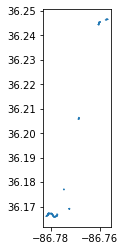

In [29]:
slow_lni_school.plot()

<AxesSubplot:>

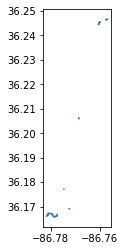

In [30]:
slow_lni_summer.plot()

In [31]:
slow_lni_sum_geojson = slow_lni_summer['geometry'].to_json()

In [32]:
slow_lni_scho_geojson = slow_lni_school['geometry'].to_json()

In [35]:
full_route = all_lni_inschool['geometry'].to_json()

In [38]:
lni23_map = folium.Map(location =  [36.2, -86.7775], zoom_start = 12)
style3 = {'color': 'gray', 'weight' : 1}
folium.GeoJson(full_route, style_function=lambda x: style3).add_to(lni23_map)
style1 = {'color': 'red', 'weight' : 6}
folium.GeoJson(slow_lni_scho_geojson, style_function=lambda x: style1).add_to(lni23_map)
style2 = {'color': 'blue', 'weight' : 3}
folium.GeoJson(slow_lni_sum_geojson, style_function=lambda x: style2).add_to(lni23_map)
lni23_map

In [39]:
import pickle

In [40]:
with open('../data/route23_slow_lni_summer.pickle', 'wb') as file:
        pickle.dump(slow_lni_summer, file)

In [41]:
with open('../data/route23_slow_lni_school.pickle', 'wb') as file:
        pickle.dump(slow_lni_school, file)